# Distracted Driving Detection

## Load the Data

In [1]:
#dictionary for distraction category to numerical value
catLabels = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup', 
    'c9': 'talking to passenger'
}

def getClass(value):
    index = 'c' + str(value)
    return catLabels[index]


In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
from sklearn.model_selection import train_test_split

def loadImages(path):
    data = load_files(path)
    files = data['filenames']
    targets = data['target']
    target_names = data['target_names']
    return files, targets, target_names

path = "images/train"
files,targets,target_names = loadImages(path)
predict_files = np.array(glob("images/test/*"))[1:10]
print('Number of Categories: ', len(target_names))
print('Categories: ', target_names)
print('Number of images by category: ')
for c in target_names:
    print(c + ':' + str(len( os.listdir(path+'/'+c))))
# train_data = np.vstack((files, targets)).T
# print(train_data.shape)

#Split the original training sets into training & validation sets
train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=0.20, random_state=40)

print(train_files.shape, test_files.shape, train_targets.shape, test_targets.shape)
print(len(test_files))


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


('Number of Categories: ', 10)
('Categories: ', ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
Number of images by category: 
c0:1900
c1:1900
c2:1900
c3:1900
c4:1900
c5:1900
c6:1900
c7:1900
c8:1900
c9:1900
((15200,), (3800,), (15200,), (3800,))
3800


# Data Analysis

8
hair and makeup


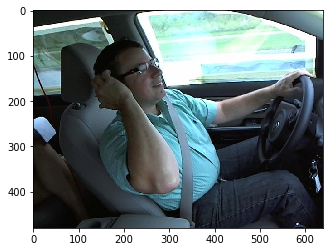

9
talking to passenger


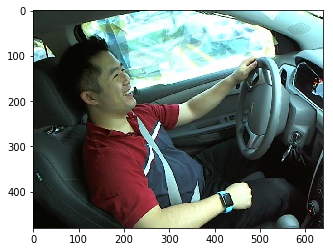

0
safe driving


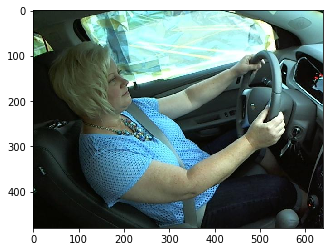

0
safe driving


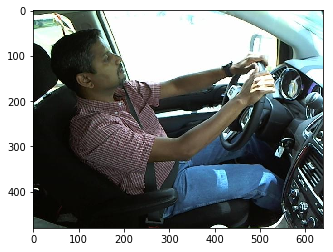

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def displayImage(sample_image):
    gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
    
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

for i in range(1,5):
    sample_image = cv2.imread(train_files[i])
    print(train_targets[i])
    print getClass(train_targets[i])
    displayImage(sample_image)
    


In [4]:

#(nb_samples,rows,columns,channels)
#nb_samples - total number of images
# Resize image to 224x224 
# Convert image to an array -> resized to a 4D tensor used by Keras CNN
# Tensor will be (1,224,224,3)

#Adopted from the Deep Learning Project
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    print (img_paths)
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


## Pre-Process the Data


In [ ]:
#Rescale the images 

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
#predict_tensors = paths_to_tensor(predict_files).astype('float32')/255


  0%|          | 10/15200 [00:00<02:39, 95.18it/s]

['images/train/c3/img_24663.jpg' 'images/train/c8/img_98810.jpg'
 'images/train/c9/img_67390.jpg' ... 'images/train/c7/img_31727.jpg'
 'images/train/c7/img_82756.jpg' 'images/train/c5/img_21995.jpg']


100%|██████████| 15200/15200 [02:00<00:00, 125.77it/s]


## Baseline Model Architecture

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D 
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.utils import plot_model

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=10, kernel_size=(4,4), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(Conv2D(filters=10, kernel_size=(4,4), input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4, 4), strides=None, padding='valid', data_format=None))
model.add(GlobalAveragePooling2D())
model.add(Dense(units=10, activation='softmax'))
model.summary()


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# plot_model(model, to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))


## Train the Model

In [ ]:
from keras.callbacks import ModelCheckpoint  
from keras.utils import np_utils

print("Train Targets", train_targets)
print ("Test Targets", test_targets)
train_targets_onehot = np_utils.to_categorical(np.array(train_targets),10)
test_targets_onehot = np_utils.to_categorical(np.array(test_targets),10)
print ("Train Targets One-hot encoded", train_targets_onehot)
print ("Test Targets One-hot encoded", test_targets_onehot)

print(train_targets_onehot.shape)
print(test_targets_onehot.shape)

def train_model(_epochs):
    epochs = _epochs

    checkpointer = ModelCheckpoint(filepath='./saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
    
    model.fit(train_tensors, train_targets_onehot, validation_split=.20,
          epochs=epochs, batch_size=32, callbacks=[checkpointer], verbose=1)
    

train_model(2000)

In [ ]:
p = model.predict(test_tensors)
#print (p)
z=np.argmax(p,axis=1)
#print("z = ", z)
for i in range(1,10):
    img = np.squeeze(np.array(test_tensors[i]))
    displayImage(img)
    print("Predicted class", getClass(i))
    print ("Actual Class", getClass(test_targets[i]))
# def predict_distraction(test_data_tensor):
#     # get index of predicted distraction for each image in test set
#     distraction_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors

#     # report test accuracy
#     test_accuracy = 100*np.sum(np.array(distraction_predictions)==np.argmax(test_targets, axis=0))/len(distraction_predictions)
#     print('Test accuracy: %.4f%%' % test_accuracy)
#     return test_accuracy
